# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Rushad | Rakhimov | Rushad Rakhimov, October 14, 2024 | 8 | 25% |
| Member 2: | Milena | Ljusic | Milena Ljusic, October 14, 2024| 8 | 25% |
| Member 3: | Priya | Bosman | Priya Bosman, October 14, 2024 | 8 | 25% |
| Member 4: | Syem | Imtiaz | Syem Imtiaz, October 14, 2024 | 8 | 25% |

# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

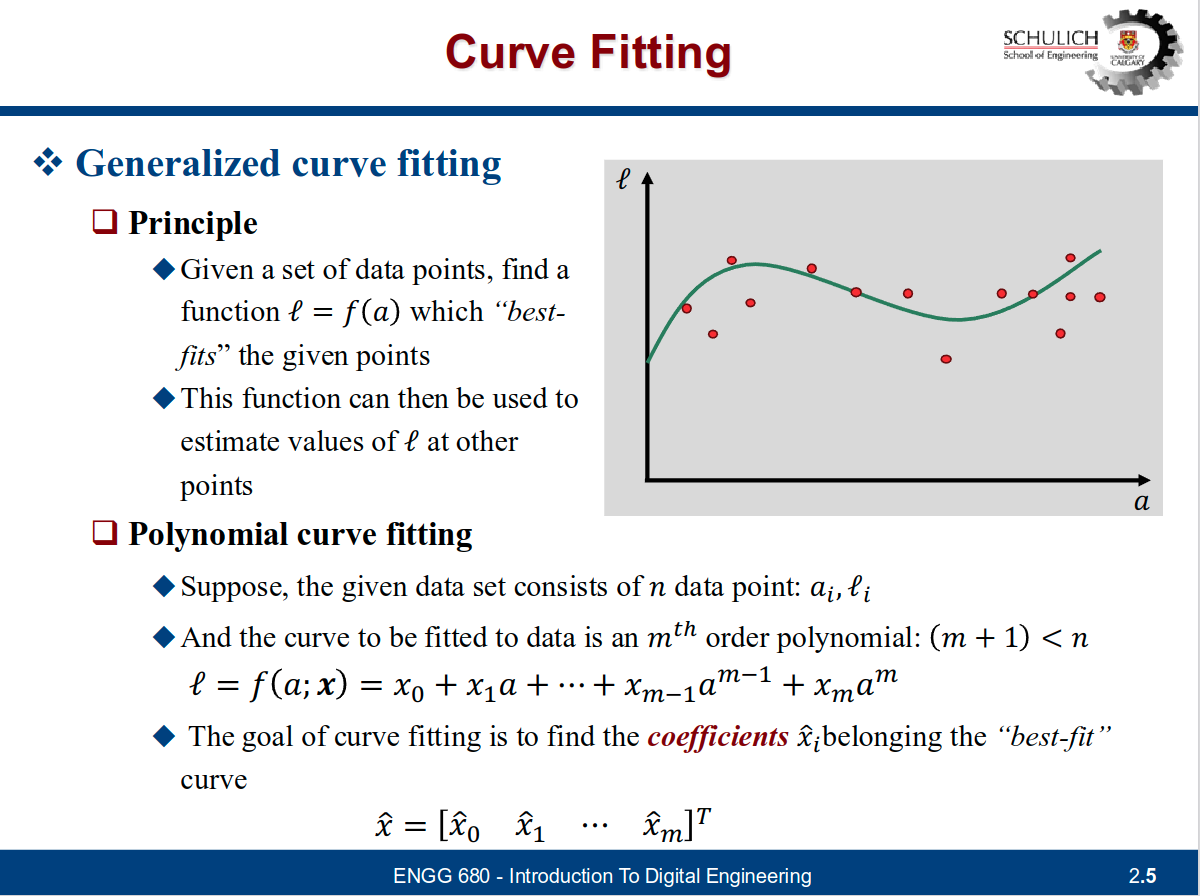

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [1]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('data.xlsx')
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = df_data['l'].to_numpy()
l_var = df_data['l_var'].to_numpy()
l_true = df_data['l_true'].to_numpy()

In [3]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.eye(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1 * np.pi
end = np.pi
a = np.linspace(start, end, n)

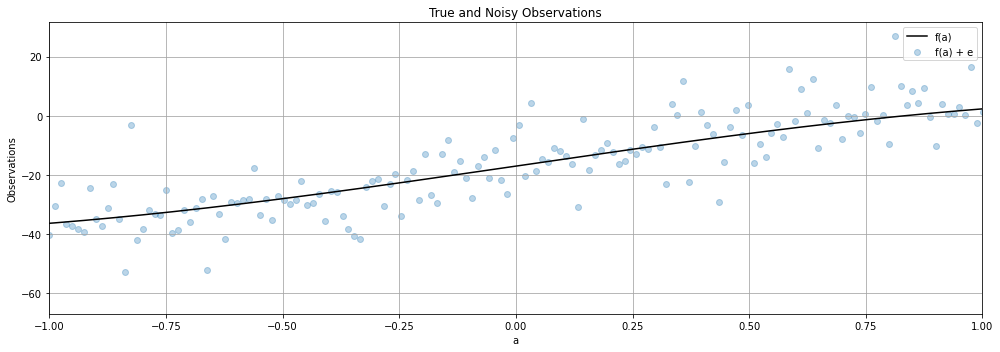

In [4]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

ax.plot(a, l_true, label="f(a)", color='k') # true function
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3) # observations corrupted with noise

plt.title('True and Noisy Observations')
plt.xlabel('a')
plt.ylabel('Observations')
plt.xlim(-1, 1)
plt.legend()

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [5]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''
    
    # create design matrix A for any polynomial degree, then transpose it
    A = np.vander(a, deg+1, increasing=True)
    AT = A.T 
    
    # matrix multiplication to find coefficients
    AT_P_A= AT @ P @ A
    AT_P_A_inv= np.linalg.inv(AT_P_A)
    AT_P_l = AT @ P @ l
    x = AT_P_A_inv @ AT_P_l
    
    # find v
    A_x = A @ x
    v = np.subtract(l,A_x)
    
    # find apv
    vT = v.T
    vT_P_v = vT @ P @ v
    term1 = 1/(n-(deg+1))
    apv = term1 * vT_P_v
    
    # find cov_x
    cov_x = apv * AT_P_A_inv

    return (x, cov_x, apv, v)

In [6]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
x1, cov_x1, apv1, v1 = fit_polynomial_curve(a, l, P, deg=1)
x3, cov_x3, apv3, v3 = fit_polynomial_curve(a, l, P, deg=3)
x5, cov_x5, apv5, v5 = fit_polynomial_curve(a, l, P, deg=5)

In [7]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

line_uw = np.polyval(x1[:2][::-1], a) #order is 1, therefore want 2 coefficients to satisfy (m+1)
cubic_uw = np.polyval(x3[:4][::-1], a) #order is 3, therefore want 4 coefficients to satisfy (m+1)
quintic_uw = np.polyval(x5[:6][::-1], a) #order is 5, therefore want 6 coefficients to satisfy (m+1)

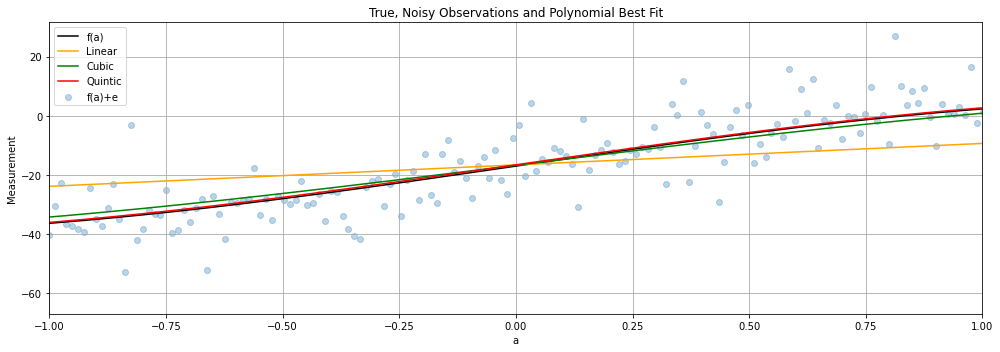

In [8]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
plt.scatter(a, l, color='tab:blue', alpha=0.3, label='f(a)+e')  # Noisy observations
plt.plot(a, l_true, color='k', label='f(a)')  # True observations

plt.plot(a, line_uw, color='orange', label='Linear')  # Linear (degree 1)
plt.plot(a, cubic_uw, color='green', label='Cubic')  # Cubic (degree 3)
plt.plot(a, quintic_uw, color='red', label='Quintic')  # Quintic (degree 5)

plt.title('True, Noisy Observations and Polynomial Best Fit')
plt.xlabel('a')
plt.ylabel('Measurement')
plt.xlim(-1, 1)
plt.legend()

ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

In [9]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)

print("Posterior variance at degree 1 (Linear):", apv1)
print("Posterior variance at degree 3 (Cubic):", apv3)
print("Posterior variance at degree 5 (Quintic):", apv5)

Posterior variance at degree 1 (Linear): 162.742608604322
Posterior variance at degree 3 (Cubic): 66.13227783131885
Posterior variance at degree 5 (Quintic): 63.7583446301842


In [10]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)

norm1 = np.linalg.norm((l_true - line_uw), ord=2)  # norm for Linear (degree 1)
norm3 = np.linalg.norm((l_true - cubic_uw), ord=2)  # norm for  Cubic (degree 3)
norm5 = np.linalg.norm((l_true - quintic_uw), ord=2)  # norm for Quintic (degree 5)

# Print the norms
print("L2 norm between true and linear predicted observations:", norm1)
print("L2 norm between true and cubic predicted observations:", norm3)
print("L2 norm between true and quintic predicted observations:", norm5)

L2 norm between true and linear predicted observations: 229.0601679674409
L2 norm between true and cubic predicted observations: 38.28597992911678
L2 norm between true and quintic predicted observations: 17.36996719696641


In [11]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)

## APV:
# APV helps compare polynomial fits of different degrees.
# In our case, as the polynomial degree increases, APV decreases.
# This indicates that the higher-degree polynomial (Quintic) provides the best fit among the three.

## norm
# L2 norm is a metric to compare how well each fit approximates the true observations.
# In our case, as the polynomial degree increases, norm decreases.
# It means we have the best fit with quintic polynomial.

In [12]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)

P_weighted = np.diag(1 / l_var)
P_weighted

array([[0.02777778, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00694444, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00591716, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.04      , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.015625  ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ]])

Posterior variance at degree 1 (Linear): 12.054651233436905
Posterior variance at degree 3 (Cubic): 1.1444647026537134
Posterior variance at degree 5 (Quintic): 0.944700904385655
L2 norm between true and linear predicted observations: 230.6776081383295
L2 norm between true and cubic predicted observations: 36.0702668726679
L2 norm between true and quintic predicted observations: 5.741606915883527


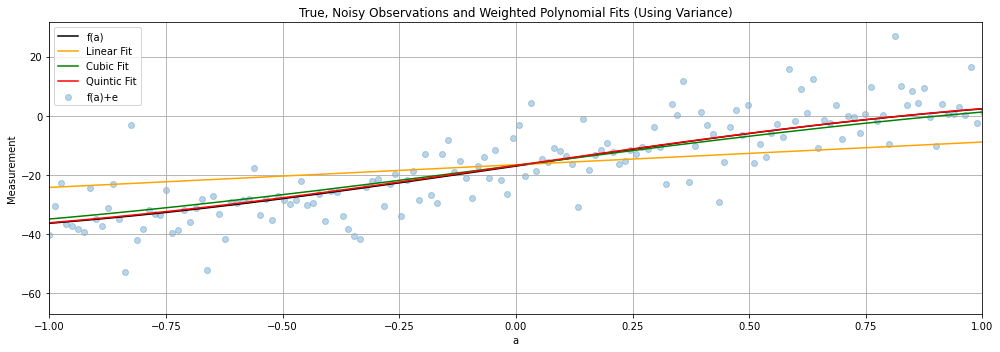

In [13]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)

# repeating step 6 - fit the curve
x1_w, cov_x1_w, apv1_w, v1_w = fit_polynomial_curve(a, l, P_weighted, deg=1)
x3_w, cov_x3_w, apv3_w, v3_w = fit_polynomial_curve(a, l, P_weighted, deg=3)
x5_w, cov_x5_w, apv5_w, v5_w = fit_polynomial_curve(a, l, P_weighted, deg=5)

# repeating step 7 - construct polynomial functions for each degree
line_uw_w = np.polyval(x1_w[:2][::-1], a) #order is 1, therefore want 2 coefficients to satisfy (m+1)
cubic_uw_w = np.polyval(x3_w[:4][::-1], a) #order is 3, therefore want 4 coefficients to satisfy (m+1)
quintic_uw_w = np.polyval(x5_w[:6][::-1], a) #order is 5, therefore want 6 coefficients to satisfy (m+1)

# repeating step 8 - plotting
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

plt.scatter(a, l, color='tab:blue', alpha=0.3, label='f(a)+e')  # Noisy observations
plt.plot(a, l_true, color='k', label='f(a)')  # True observations
plt.plot(a, line_uw_w, color='orange', label='Linear Fit')  # Linear fit (degree 1)
plt.plot(a, cubic_uw_w, color='green', label='Cubic Fit')  # Cubic fit (degree 3)
plt.plot(a, quintic_uw_w, color='red', label='Quintic Fit')  # Quintic fit (degree 5)

plt.title('True, Noisy Observations and Weighted Polynomial Fits (Using Variance)')
plt.xlabel('a')
plt.ylabel('Measurement')
plt.xlim(-1, 1)
plt.legend()
ax.grid(True, which='both', ls='-', color='0.65')
fig.tight_layout()

# repeating step 9 - calculating APV
print("Posterior variance at degree 1 (Linear):", apv1_w)
print("Posterior variance at degree 3 (Cubic):", apv3_w)
print("Posterior variance at degree 5 (Quintic):", apv5_w)

# repeating step 10 - calculating norms
norm1_w = np.linalg.norm((l_true - line_uw_w), ord=2)  # Norm for degree 1
norm3_w = np.linalg.norm((l_true - cubic_uw_w), ord=2)  # Norm for degree 3
norm5_w = np.linalg.norm((l_true - quintic_uw_w), ord=2)  # Norm for degree 5

print("L2 norm between true and linear predicted observations:", norm1_w)
print("L2 norm between true and cubic predicted observations:", norm3_w)
print("L2 norm between true and quintic predicted observations:", norm5_w)

In [14]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)

# The quintic polynomial offers the best fit for both LSE and weighted LSE as APV and norm are the lowest.
# However, in Weighted LSE, lower APV and L2 norm are observed compared to Non-Weighted LSE.
# This is the case because the weighted LSE model prioritizes observations with lower variance (more reliable data), 
# which leads to a better fit.

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

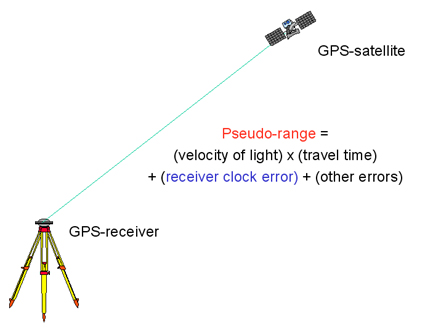

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [15]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel('pseudoranges.xlsx')
df_sat_pos = pd.read_excel('satellite_position.xlsx')

pseudorange = df_pseudorange.to_numpy() 
sat_pos = df_sat_pos.to_numpy()

In [16]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = pseudorange.shape[0]
m = 4  # Number of states (3 for position x, y, z and 1 for clock offset cdT)

In [17]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)

P = np.identity(n)
P

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [18]:
# step 4
# set the initial states as zeros:
# (1 mark)

x_0 = np.zeros(m)

In [19]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [20]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

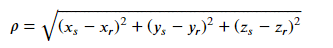

In [21]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)

def euclidean_norm(receiver_pos, satellite_pos):
    # Difference between each satellite and the receiver (each position x, y, z)
    diff_x = satellite_pos[:, 0] - receiver_pos[0]
    diff_y = satellite_pos[:, 1] - receiver_pos[1]
    diff_z = satellite_pos[:, 2] - receiver_pos[2]
    
    # Compute the Euclidean distance based on equation in the description
    distance = np.sqrt(diff_x**2 + diff_y**2 + diff_z**2)
    
    return distance


# # Receiver position (initial guess from the previous steps)
# receiver_pos = np.array([0, 0, 0])
# distances = euclidean_norm(receiver_pos, sat_pos)

# # Display the results
# distances

In [22]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(receiver_pos, sat_pos, rho):

    # design matrix A (n x m array)
    A = np.zeros((n, m))

    # Loop over each satellite to compute the partial derivatives
    for j in range(n):
        # Compute the partial derivatives for xr, yr, zr
        A[j, 0] = (receiver_pos[0] - sat_pos[j, 0]) / rho[j]
        A[j, 1] = (receiver_pos[1] - sat_pos[j, 1]) / rho[j]
        A[j, 2] = (receiver_pos[2] - sat_pos[j, 2]) / rho[j]
        A[j, 3] = 1  

    return A

In [23]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

while np.linalg.norm(delta[:3]) > 0.001:

    # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
    # (1 marks)
    rho = euclidean_norm(x_hat[:3], sat_pos[:,1:4])

    # compute the design matrix A
    # (1 marks)
    A = design_matrix(x_hat[:3], sat_pos[:,1:4], rho)

    # compute the misclosure array w
    # (1 marks)
    w = pseudorange[:,1] - (rho + x_hat[3])

    # compute the corrections delta
    # (1 marks)
    delta = np.linalg.pinv(A.T @ P @ A) @ (A.T @ P @ w)

    # update the states
    # (1 marks)
    x_hat +=delta


    # compute the position error from using the updated states against groundtruth
    # (1 marks)
    err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)


    # update the counter i, (i.e., increament of 1 for each iteration)
    i += 1


    # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
    # (1 marks)
    arr_w.append(w)
    arr_delta.append(delta)
    arr_err_pos.append(err_pos)
    arr_i.append(i)




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = (w.T @ P @ w) / (n - m)

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = apv * np.linalg.pinv(A.T @ A) # using np.linalg.pinv (for stability) but np.linalg.inv can be used as well

In [24]:
apv

0.8852888545134385

In [25]:
C_x_hat

array([[ 0.28298264,  0.06167139, -0.07487066, -0.06468701],
       [ 0.06167139,  0.37666273, -0.51441611, -0.32601524],
       [-0.07487066, -0.51441611,  1.81094828,  0.9773772 ],
       [-0.06468701, -0.32601524,  0.9773772 ,  0.61904475]])

In [26]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)
print(f"estimated states:\n{x_hat}")

print(f"\ncorrections array:\n{delta}")

print(f"\nestimated measurements residuals:\n{w}")

print(f"\nA Posteriori Variance of Unit Weight:\n{apv}")

print(f"\nCovariance matrix of estimated states:\n{C_x_hat}")

print(f"\nnumber of iterations:\n{i}")

print(f"\n3-D position errors:\n{err_pos}")

estimated states:
[-1.63349244e+06 -3.65162954e+06  4.95248543e+06  6.47201390e+00]

corrections array:
[ 3.23014764e-06  6.39151625e-06 -1.75925245e-05 -2.09179300e-05]

estimated measurements residuals:
[ 0.25995968  0.11116656 -1.09951518 -0.00500947  0.2003028  -1.41816897
 -0.09127866  1.51207884  0.26364719  0.61137232 -0.3446761 ]

A Posteriori Variance of Unit Weight:
0.8852888545134385

Covariance matrix of estimated states:
[[ 0.28298264  0.06167139 -0.07487066 -0.06468701]
 [ 0.06167139  0.37666273 -0.51441611 -0.32601524]
 [-0.07487066 -0.51441611  1.81094828  0.9773772 ]
 [-0.06468701 -0.32601524  0.9773772   0.61904475]]

number of iterations:
5

3-D position errors:
5.431614725907281


In [27]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

# APV = 0.885 which is lose to 1. It implies a good model fit and sufficiently minimized residuals.
# Covariance matrix of estimated states. Small diagonal values mean high precision. 

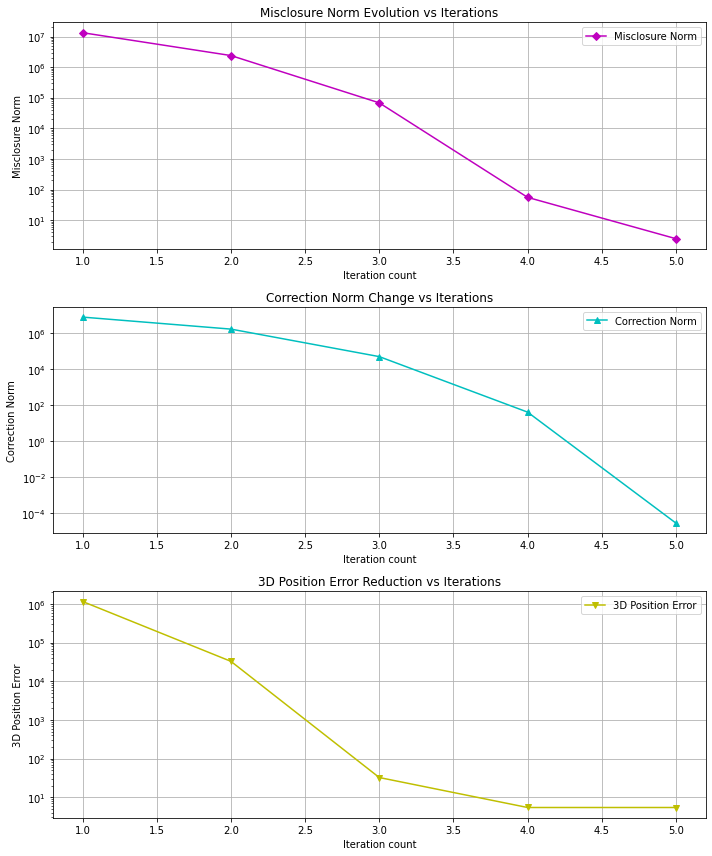

In [28]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

log_misclosure_norms = [np.log(np.linalg.norm(w)) for w in arr_w if np.linalg.norm(w) > 0]
log_corrections = [np.log(np.linalg.norm(delta)) for delta in arr_delta if np.linalg.norm(delta) > 0]
log_position_errors = [np.log(err) for err in arr_err_pos if err > 0]

fig, axs = plt.subplots(3, 1, figsize=(10, 12))

titles = ['Misclosure Norm Evolution', 
          'Correction Norm Change', 
          '3D Position Error Reduction']
y_labels = ['Misclosure Norm', 
            'Correction Norm', 
            '3D Position Error']
log_data = [arr_w, arr_delta, arr_err_pos]
markers = ['D', '^', 'v']  
colors = ['m', 'c', 'y']   


for i, ax in enumerate(axs):
    ax.plot(arr_i[:len(log_data[i])], [np.linalg.norm(data) for data in log_data[i]], 
            marker=markers[i], color=colors[i], label=y_labels[i])
    ax.set_yscale('log')  
    ax.set_title(f'{titles[i]} vs Iterations')
    ax.set_xlabel('Iteration count')
    ax.set_ylabel(y_labels[i])
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

In [29]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

# Misclosure Norm: It decreases rapidly, showing that the model is fitting better with each iteration.
# Correction Norm: Corrections decrease rapidly, values converge toward the solution.
# 3D Position Error: Receiver location accuracy improves with each iteration (error goes down).

In [30]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!


Using final estimated states:

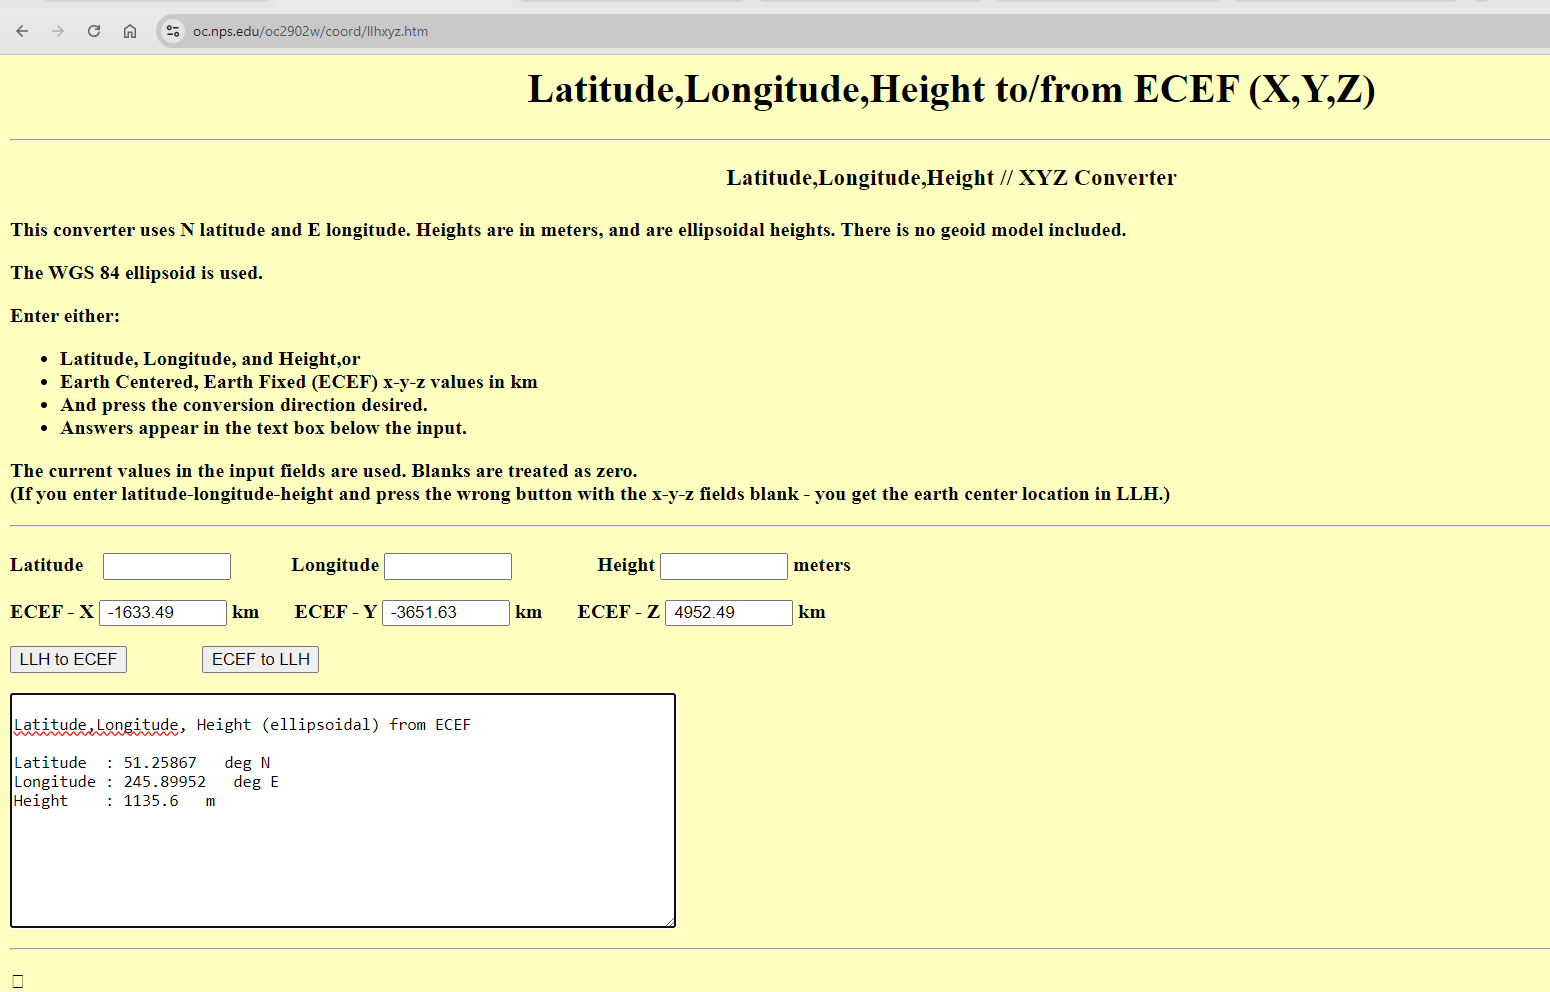

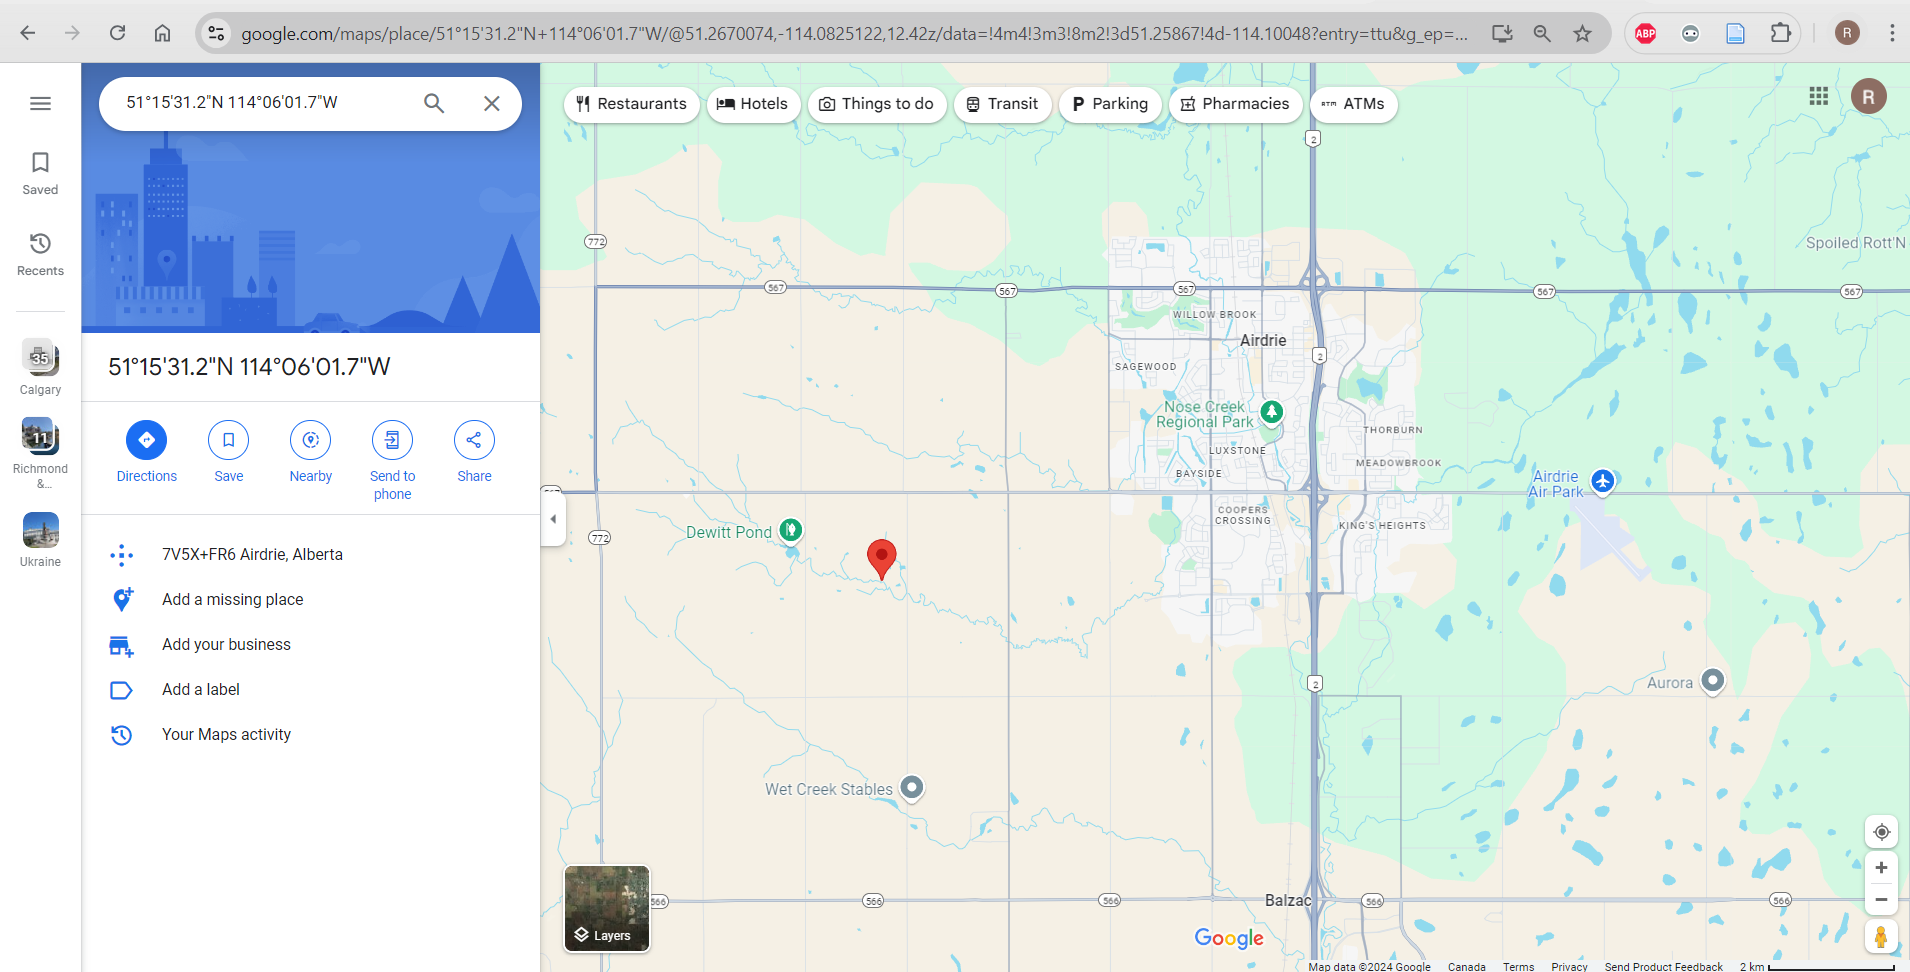